In [155]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [156]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [157]:
df.shape
df.columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [158]:
#Data preparation - clean data
missing = df.isnull().sum()
print(missing[missing>0])

bmi    5
dtype: int64


In [159]:
#Fill in with mean value due to float type
df['bmi'].fillna(int(df['bmi'].mean()), inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [160]:
df['bmi'].isnull().sum()

0

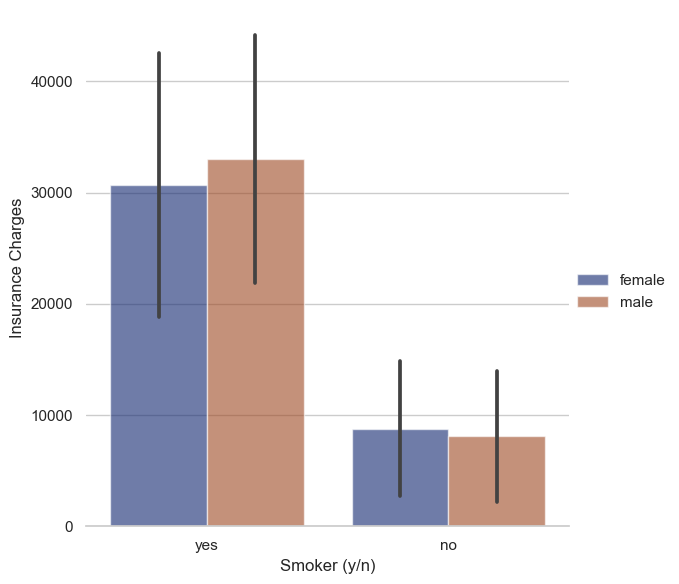

In [161]:
#Data visualization
sns.set_theme(style='whitegrid')

g = sns.catplot(
    data=df, kind='bar', x='smoker', y='charges', hue='sex', ci='sd', palette='dark', alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels('Smoker (y/n)', 'Insurance Charges')
g.legend.set_title('')

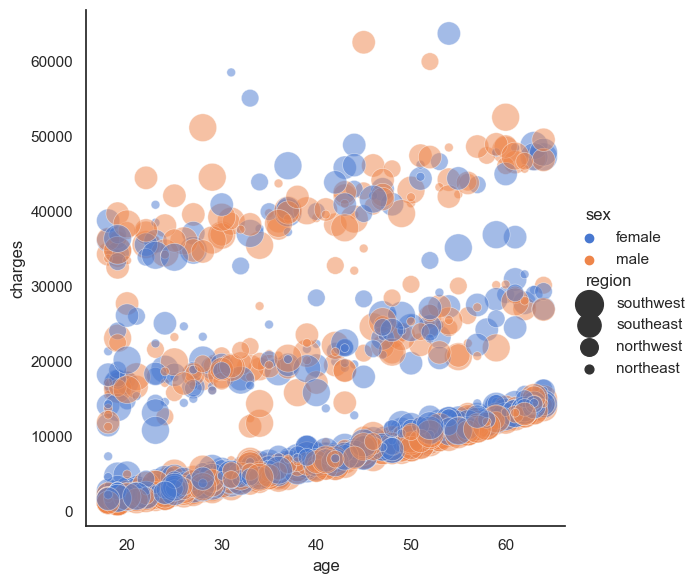

In [162]:
sns.set_theme(style='white')

sns.relplot(x='age', y='charges', hue='sex', size='region', sizes=(40,400), alpha=.5, palette='muted', height=6, data=df)

Text(0.5, 1.0, 'Correlation Matrix')

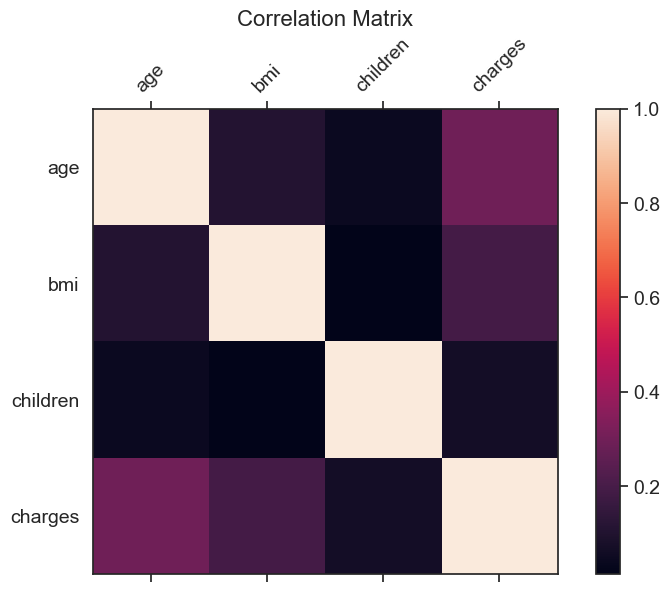

In [163]:
f = plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

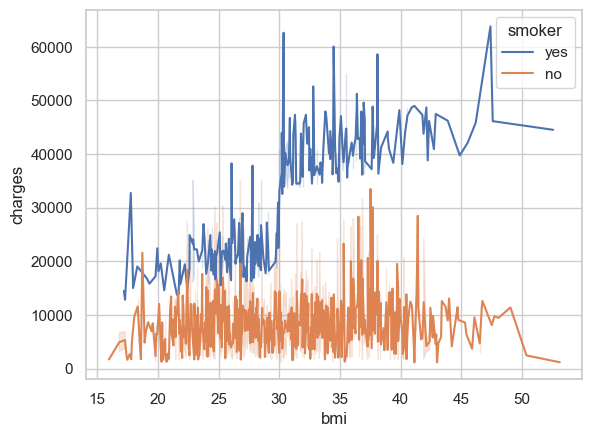

In [164]:
sns.set_style('whitegrid')
sns.lineplot(x="bmi", y="charges", hue="smoker", palette='deep', data=df)

In [165]:
#Apply age range for better vis
def categorise(row): 
    if row['age'] < 20:
        return 'Under 20'
    elif row['age'] >= 20 and row['age'] < 30:
        return '20-29'
    elif row['age'] >= 30 and row['age'] < 40:
        return '30-39'
    elif row['age'] >= 40 and row['age'] < 50:
        return '40-49'
    elif row['age'] >= 50 and row['age'] < 60:
        return '50-59'
    elif row['age'] >= 60:
        return '60 and up'

In [166]:
df['age_Groups'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_Groups
0,19,female,27.900,0,yes,southwest,16884.92400,Under 20
1,18,male,33.770,1,no,southeast,1725.55230,Under 20
2,28,male,33.000,3,no,southeast,4449.46200,20-29
3,33,male,22.705,0,no,northwest,21984.47061,30-39
4,32,male,28.880,0,no,northwest,3866.85520,30-39


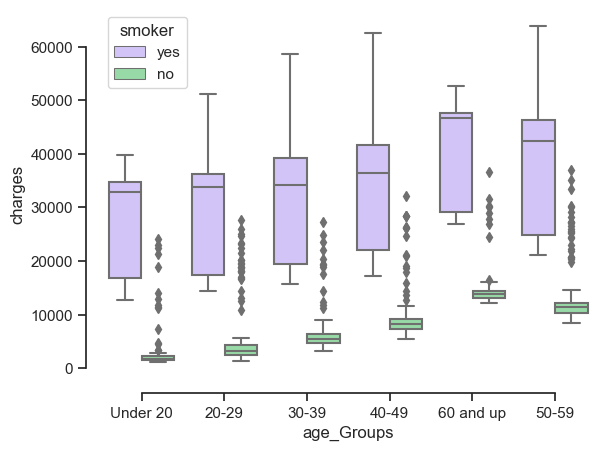

In [167]:
sns.set_theme(style="ticks", palette='pastel')
sns.boxplot(x="age_Groups", y="charges", hue="smoker", palette=["m", "g"], data=df)
sns.despine(offset=10, trim=True)

In [168]:
#Convert categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [169]:
sex = df.iloc[:,1:2].values #identify what column you are working with
smoker = df.iloc[:,4:5].values

In [170]:
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_sex_mapping)
print(sex[:10])

{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [171]:
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_smoker_mapping)
print(smoker[:10])

{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [175]:
region = df.iloc[:,5:6].values

ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])

Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


In [176]:
age_groups = df.iloc[:,7:8].values

ohe = OneHotEncoder() 

age_groups = ohe.fit_transform(age_groups).toarray()
age_groups = pd.DataFrame(age_groups)
age_groups.columns = ['Under 20', '20-29', '30-39', '40-49', '50-59', '60 and up']
print("Sklearn one hot encoder results for region:")  
print(age_groups[:10])

Sklearn one hot encoder results for region:
   Under 20  20-29  30-39  40-49  50-59  60 and up
0       0.0    0.0    0.0    0.0    0.0        1.0
1       0.0    0.0    0.0    0.0    0.0        1.0
2       1.0    0.0    0.0    0.0    0.0        0.0
3       0.0    1.0    0.0    0.0    0.0        0.0
4       0.0    1.0    0.0    0.0    0.0        0.0
5       0.0    1.0    0.0    0.0    0.0        0.0
6       0.0    0.0    1.0    0.0    0.0        0.0
7       0.0    1.0    0.0    0.0    0.0        0.0
8       0.0    1.0    0.0    0.0    0.0        0.0
9       0.0    0.0    0.0    0.0    1.0        0.0


In [179]:
#take numerical data from original data - no real need to include age_groups unless the model doesn't perform well
x_num = df[['age', 'bmi', 'children']]
#take encoded data and add to numerical data
x_final = pd.concat([x_num, sex, smoker, region], axis=1)
#define y as being charges column
y_final = df[['charges']].copy()

#Train, test split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.33, random_state=0)

In [181]:
#Feature scaling and data normalization/standardization - reduce effect of features with larger scale and dilute bias from outliers
from sklearn.preprocessing import MinMaxScaler #min max = scales to 0,1 else in range -1,1
from sklearn.preprocessing import StandardScaler #std scaler, makes mean =0
n_scaler = MinMaxScaler()
x_train = n_scaler.fit_transform(x_train.astype(float))
x_test = n_scaler.transform(x_test.astype(float))

In [182]:
s_scaler = StandardScaler()
x_train = s_scaler.fit_transform(x_train.astype(float))
x_test = s_scaler.transform(x_test.astype(float))

In [183]:
#Building regression model
#a: Simple linear regression
from sklearn.linear_model import LinearRegression

In [184]:
lr = LinearRegression().fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(x_train,y_train),
lr.score(x_test, y_test)))

lr.coef_: [[3.66804197e+03 1.84718862e+03 9.58258769e+02 2.07573066e+02
  9.34899169e+03 4.63598582e+17 4.70466438e+17 4.88997955e+17
  4.80450166e+17]]
lr.intercept_: [13159.36046796]
lr train score 0.726, lr test score: 0.781


In [186]:
#Polynomial regression - more complex relationship to work with (technically still linear but features are polynomial)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures (degree = 2)
x_poly = poly.fit_transform(x_final)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y_final, test_size = 0.33, random_state = 0)

#Scale data 
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test= sc.transform(x_test.astype(float))

polylr = LinearRegression().fit(x_train, y_train)

y_train_pred = polylr.predict(x_train)
y_test_pred = polylr.predict(x_test)

print("plr.coef_: {}".format(polylr.coef_))
print("plr.intercept_: {}".format(polylr.intercept_))
print('poly train score %.3f, poly test score: %.3f' % (
polylr.score(x_train,y_train),
polylr.score(x_test, y_test)))

#86% with quadratic fit, improvement over simple linear regression

plr.coef_: [[ 6.14629023e-14  1.18264894e+15 -3.99291150e+15 -1.21536223e+17
   3.76648038e+15 -1.45799183e+16 -9.11079991e+15  9.00977229e+14
   5.35362267e+15 -1.37593593e+16  3.76308120e+03 -1.88596026e+03
  -8.54835700e+02  5.89868801e+02  3.26426549e+02 -1.53004915e+15
  -1.56466875e+15 -1.59608800e+15 -1.55306901e+15 -2.14358433e+03
   2.15999401e+02 -7.13359192e+01  1.84019067e+04  8.19341873e+15
   8.23931205e+15  9.89972899e+15  8.84713636e+15 -2.68505028e+02
  -4.48145418e+01 -6.19321457e+02  7.37833754e+16  7.39691728e+16
   7.59306387e+16  8.51072705e+16  4.88689030e+15  2.00000000e+01
  -5.56710148e+15 -5.54402917e+15 -5.97675893e+15 -5.65779049e+15
  -1.94568634e+15  8.93135599e+15  8.43323065e+15  1.04106877e+16
   8.00768281e+15 -4.62490665e+15  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.48401677e+16  0.00000000e+00  0.00000000e+00
  -1.98418732e+16  0.00000000e+00 -4.75633554e+14]]
plr.intercept_: [13263.9006901]
poly train score 0.822, poly test score: 0.860


In [188]:
#Support vector regression - goal to create optimal margin for separation of maximum datapoints (hyperplane - data sitting closest = support vectors)
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr = SVR(kernel='linear', C=300)
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test= sc.transform(x_test.astype(float))

#fit model
svr = svr.fit(x_train,y_train.values.ravel()) 
y_train_pred = svr.predict(x_train)
y_test_pred = svr.predict(x_test)

#print score
print("svr.coef_: {}".format(svr.coef_))
print("svr.intercept_: {}".format(svr.intercept_))
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(x_train,y_train),
svr.score(x_test, y_test))) 

svr.coef_: [[3652.63101901  203.21586024  475.56339007 -185.41365967 6571.58634259
   179.47938571   33.10682328 -126.28417213  -77.07216826]]
svr.intercept_: [10370.6728504]
svr train score 0.598, svr test score: 0.628


In [190]:
#Decision Tree regression - tendency to overfit
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test) - repitition not necessary technically, just want standalone code for eval
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test= sc.transform(x_test.astype(float))

#fit model
dt = dt.fit(x_train,y_train.values.ravel())
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(x_train,y_train),
dt.score(x_test, y_test)))

dt train score 0.999, dt test score: 0.721


In [192]:
#Random forest regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error', random_state = 1, n_jobs = -1)
#test train split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test= sc.transform(x_test.astype(float))

#fit model
forest.fit(x_train,y_train.values.ravel())
y_train_pred = forest.predict(x_train)
y_test_pred = forest.predict(x_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(x_train,y_train),
forest.score(x_test, y_test)))


forest train score 0.973, forest test score: 0.862


In [194]:
#Model evaluation
#Hyperparameter optimization: Grid search, random search, bayesian optimiation, gradient based optimization, etc.

from sklearn.model_selection import GridSearchCV

# C = penalty param of error term, epsilon defines margin of tolerance, cv is cross validation 
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

#test train split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test= sc.transform(x_test.astype(float))

#SVR param grid
param_grid_svr = dict(kernel=[ 'linear', 'poly'], degree=[2], C=[600, 700, 800, 900], epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

#fit model
svr = svr.fit(x_train,y_train.values.ravel())

#print score
print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(x_train,y_train),
svr.score(x_test, y_test)))
#print(svr.best_estimator_.get_params())

print_best_params(svr)

#Decision tree param grid
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), max_depth = np.arange(4,7,1, int), min_impurity_decrease = [0, 1, 2])

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)

#fit model
dt = dt.fit(x_train,y_train.values.ravel())

#print score
print('\n\ndt train score %.3f, dt test score: %.3f' % (
dt.score(x_train,y_train),
dt.score(x_test, y_test)))
print_best_params(dt)

#Random forest param grid
param_grid_rf = dict(n_estimators=[20], max_depth=np.arange(1, 13, 2), min_samples_split=[2], min_samples_leaf= np.arange(1, 15, 2, int), bootstrap=[True, False], oob_score=[False, ])

forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
forest.fit(x_train,y_train.values.ravel())

#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(x_train,y_train),
forest.score(x_test, y_test)))

print_best_params(forest)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.671 total time=   0.0s
[CV 2/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.663 total time=   0.0s
[CV 3/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.571 total time=   0.0s
[CV 4/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.636 total time=   0.0s
[CV 5/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.555 total time=   0.0s
[CV 1/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.485 total time=   0.0s
[CV 2/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.336 total time=   0.0s
[CV 3/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.278 total time=   0.0s
[CV 4/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.372 total time=   0.0s
[CV 5/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.222 total time=   0.0s
[CV 1/5] END C=600